<a href="https://colab.research.google.com/github/NiklasSlager/equdist/blob/master/notebooks/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet -U git+https://github.com/NiklasSlager/equdist.git

evaluation time =  0.14262771606445312
iterations to convergence = 1


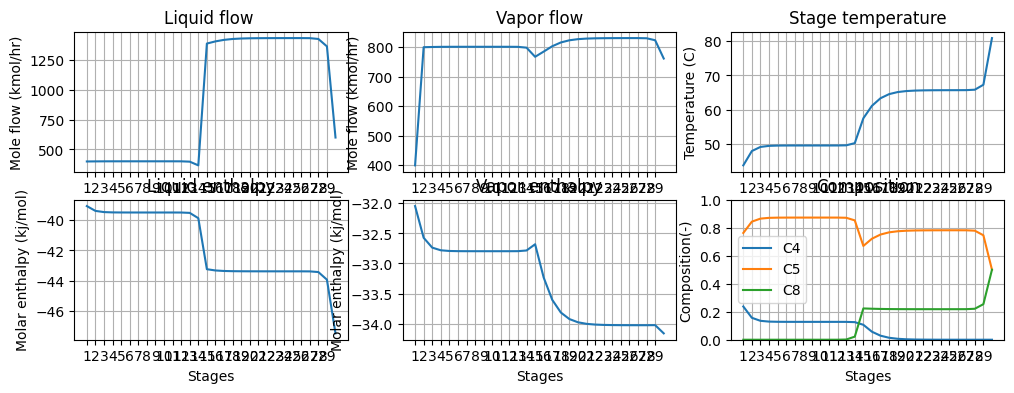

In [6]:
import jax.numpy as jnp
from time import time
from jax import jit, vmap
import matplotlib.pyplot as plt
from NR_model_test.plot_generation import plot_function
from NR_model_test.NR_model import inside_simulation as simulation
from NR_model_test.NR_model import initialize
from NR_model_test.NR_model import condensor_duty
import os

state_init= initialize()
zf = jnp.array([0., 0., 0., 0.2, 0.5, 0., 0., 0.3])
zf = zf/jnp.sum(zf)
iterations = 0
st = time()

state, iterations, res = jit(simulation)(
    state=state_init,
    nstages=jnp.array(30, dtype=int),
    feedstage=jnp.array(15, dtype=int),
    pressure=jnp.array(2.0, dtype=float),
    feed=jnp.array(1000.0, dtype=float),
    z=jnp.array(zf, dtype=float),
    distillate=jnp.array(400, dtype=float),
    rr=jnp.array(1, dtype=float),
    specs=False
)


print('evaluation time = ', time()-st)
print('iterations to convergence =', iterations)
plot_function(jnp.arange(1, state.Nstages+1), state.L[0:state.Nstages], state.V[0:state.Nstages], state.temperature[0:state.Nstages], state.Hliq[0:state.Nstages], state.Hvap[0:state.Nstages], state.X[jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages], state.Y[jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages], jnp.where(zf != 0, jnp.arange(0, len(zf)), 0))
#plot_function(jnp.arange(1, state.Nstages[0]+1), state.L[0, 0:state.Nstages[0]], state.V[0, 0:state.Nstages[0]], state.temperature[0, 0:state.Nstages[0]], state.Hliq[0, 0:state.Nstages[0]], state.Hvap[0, 0:state.Nstages[0]], state.X[0, jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages[0]], state.Y[0, jnp.where(zf != 0, jnp.arange(0, len(zf)), 0), 0:state.Nstages[0]], jnp.where(zf != 0, jnp.arange(0, len(zf)), 0))

plt.show()
